In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)
tf.keras.backend.set_floatx('float64')

TensorFlow version: 2.1.0


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [4]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.8425661 , -0.00625353,  0.38037508, -0.42665512,  0.15703684,
         0.17002134,  0.23309852, -0.1435677 , -0.50263808, -0.26416832]])

In [5]:
tf.nn.softmax(predictions).numpy()

array([[0.04582452, 0.10575572, 0.15567345, 0.06945856, 0.12451452,
        0.12614182, 0.13435479, 0.09218687, 0.06437642, 0.08171333]])

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [7]:
loss_fn(y_train[:1], predictions).numpy()

2.0703485012054443

In [8]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [9]:
fit_result = model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 165us/sample - loss: 0.2961 - accuracy: 0.9136
Epoch 2/5
60000/60000 [==============================] - 9s 146us/sample - loss: 0.1428 - accuracy: 0.9581
Epoch 3/5
60000/60000 [==============================] - 8s 129us/sample - loss: 0.1067 - accuracy: 0.9671
Epoch 4/5
60000/60000 [==============================] - 8s 125us/sample - loss: 0.0880 - accuracy: 0.9729
Epoch 5/5
60000/60000 [==============================] - 8s 125us/sample - loss: 0.0743 - accuracy: 0.9770


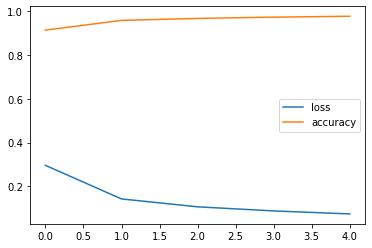

In [10]:
plt.plot(fit_result.history['loss'], label='loss')
plt.plot(fit_result.history['accuracy'], label='accuracy')
plt.legend()

In [11]:
model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 0s - loss: 0.0749 - accuracy: 0.9770


[0.07487585632224554, 0.977]

In [12]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [42]:
arr = probability_model(x_test[:10])

/home/adam/anaconda3/envs/cloud/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


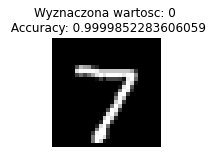

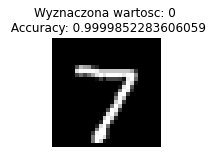

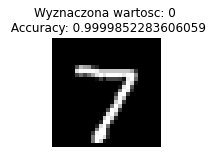

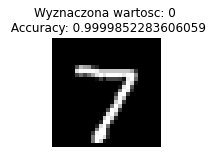

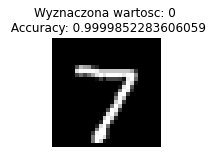

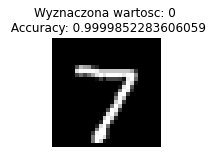

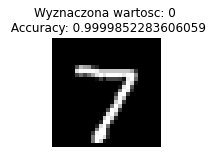

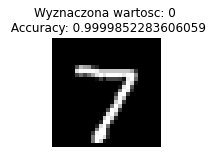

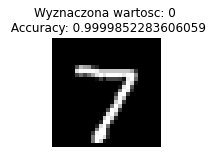

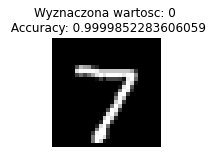

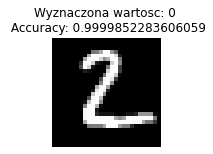

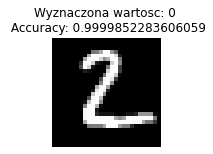

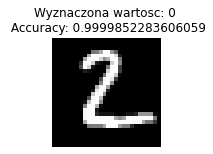

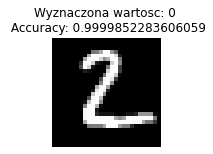

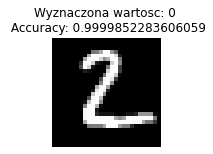

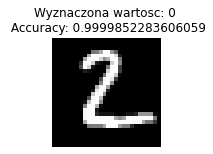

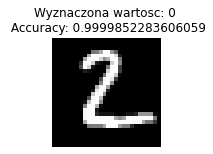

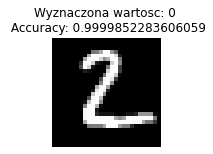

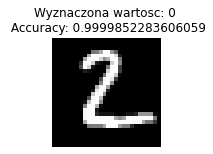

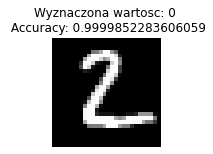

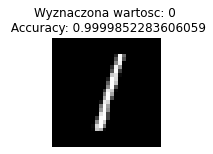

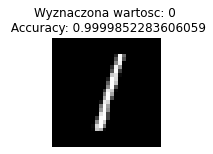

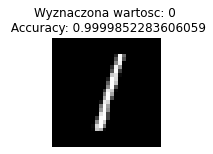

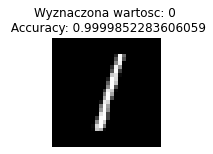

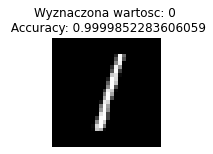

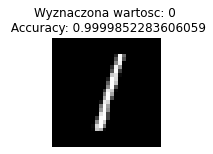

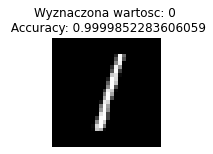

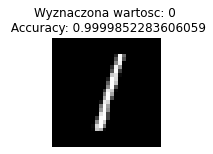

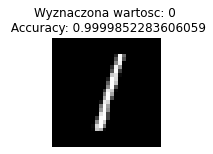

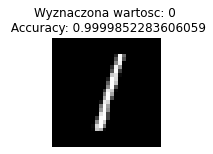

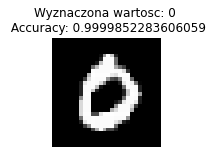

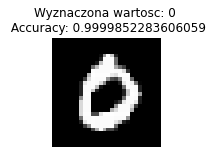

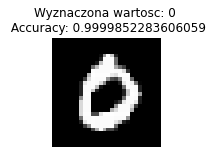

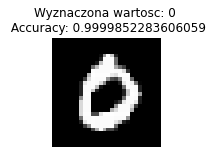

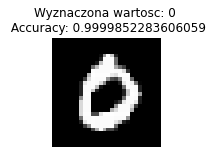

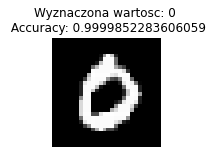

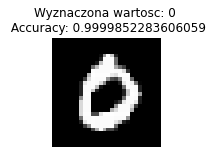

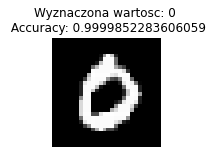

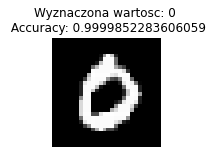

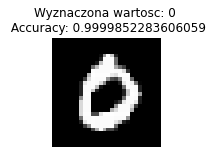

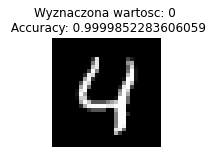

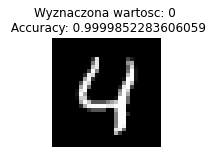

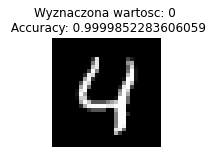

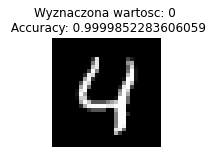

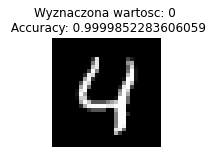

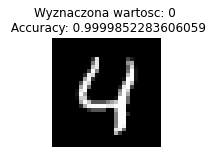

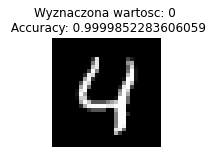

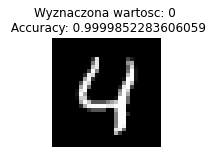

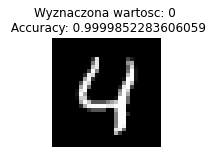

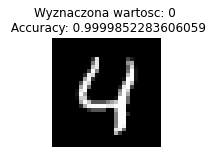

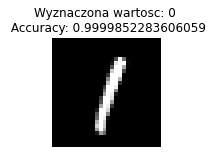

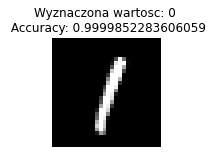

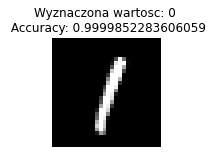

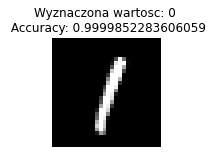

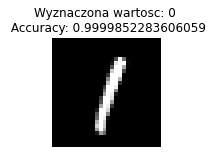

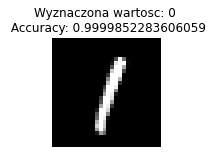

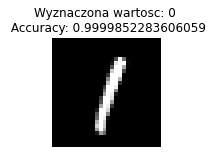

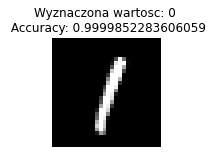

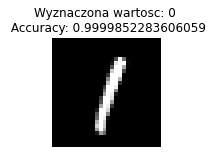

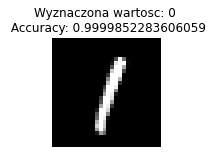

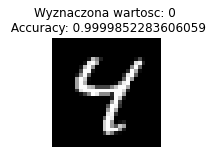

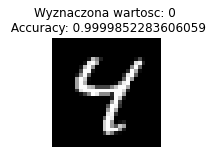

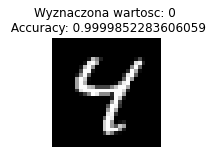

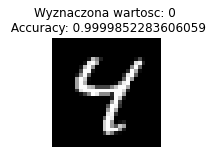

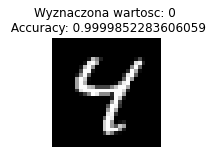

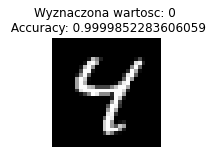

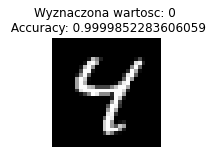

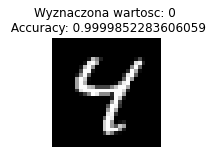

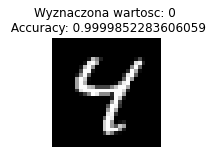

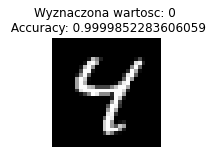

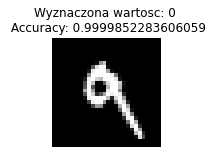

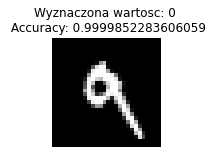

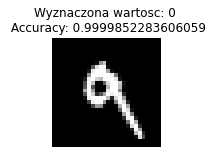

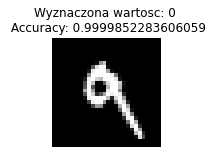

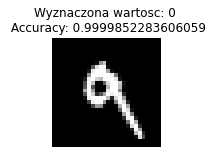

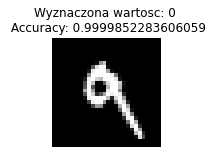

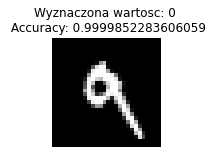

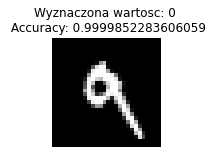

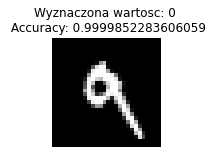

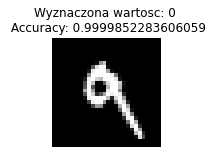

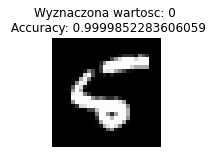

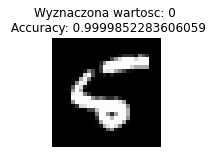

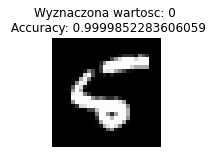

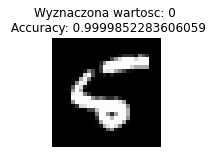

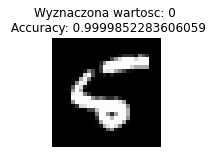

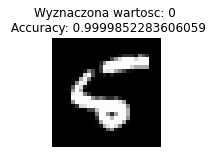

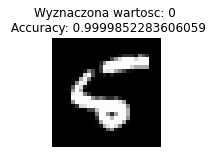

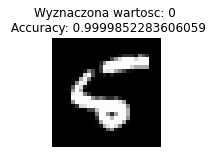

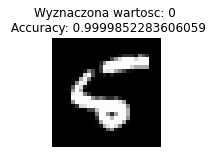

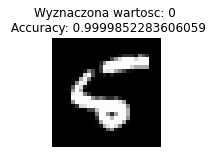

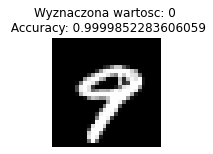

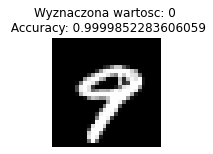

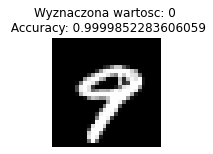

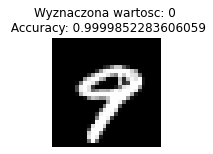

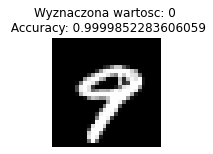

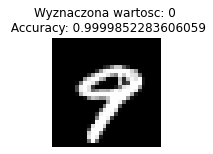

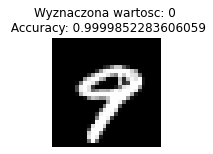

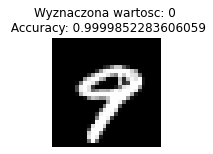

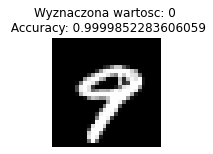

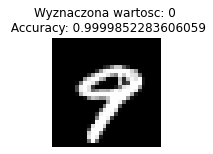

In [47]:
for x in range(len(arr)):
    value_old = 0
    for i in range(len(arr[x])): 
        
        tens = arr[x][i]
        
        
        
        if tens > value_old:
            var = i
            value = tens
            value_old = tens
            
 
    sample_image = np.array(x_test[x]) 
    sample_image = sample_image.reshape(28,28)
    plt.figure(figsize=(2,2))
    plt.axis('off')
    plt.title('Wyznaczona wartosc: {} \n Accuracy: {}'.format(var,value))
    plt.imshow(sample_image, cmap = 'gray')